### Student Information
Name: 詹睿軒

Student ID: 113062543

GitHub ID: Big-problem

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [185]:
### Begin Assignment Here

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

import helpers.data_mining_helpers as dmh

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import nltk


In [20]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [3]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])

---

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#Answer here
# Access only one value can use at and iat
print(X.at[3, 'category_name']) # by label

print(X.iat[3, 2]) # by index

soc.religion.christian
soc.religion.christian


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
# Answer here
# For {'NaN', 'None', ''}, python consider them as strings, so the  results are False
# As for {np.nan, , None}, they are considered as missing value, so the results are True

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
X_sample = X.sample(n=1000) #random state

X_sample

,text,category,category_name
721,From: schlegel@cwis.unomaha.edu (Mark Schlegel...,0,alt.atheism
218,From: eb3@world.std.com (Edwin Barkdoll) Subje...,2,sci.med
124,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
1081,From: Alla V. Kotenko <avk@lst.msk.su> Subjec...,2,sci.med
416,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
...,...,...,...
1021,From: hans@cs.kuleuven.ac.be (Hans Baele) Subj...,1,comp.graphics
253,From: bcash@crchh410.NoSubdomain.NoDomain (Bri...,0,alt.atheism
1072,From: hbloom@moose.uvm.edu (*Heather*) Subject...,2,sci.med
789,From: davem@bnr.ca (Dave Mielke) Subject: Does...,3,soc.religion.christian


In [9]:
# Answer here
# After X.sample(n=1000), we will randomly get 1000 records of X. The results are random and shuffled. The index stays the same and doesn't re-index from 0 to 999

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

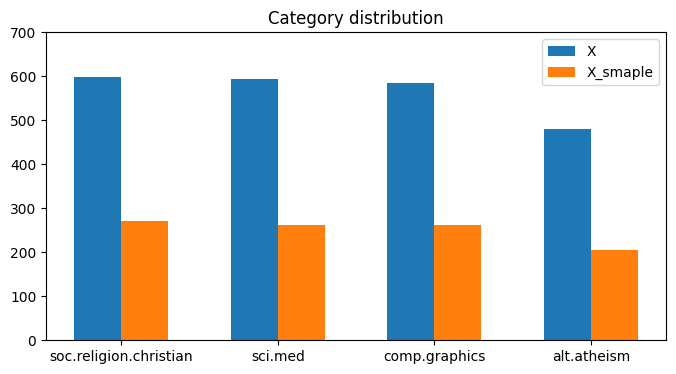

In [27]:
l1, l2, l3 = [0,1,2,3], [0.3,1.3,2.3,3.3], [0.15,1.15,2.15,3.15]
categories.sort(key = lambda x : X_sample.category_name.value_counts()[x], reverse=True)

plt.figure(figsize=(8, 4))
plt.bar(l1, X.category_name.value_counts(), 0.3, label = 'X')
plt.bar(l2, X_sample.category_name.value_counts(), 0.3, label = 'X_smaple')

plt.title('Category distribution')
plt.xticks(ticks=l3, labels=categories, rotation=0, ha='center')
plt.ylim(0, 700)
plt.legend()

plt.show()

---

In [39]:
# takes a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [60]:
# Answer here
count_vect.get_feature_names_out()[37]

'01'

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

My approach:
I still choose first 20 documents in this heatmap. As for the terms, i make sure that every column should have at least one non-zero terms. I scan from the beginning and pick the first 20 terms that satisfy this requierement

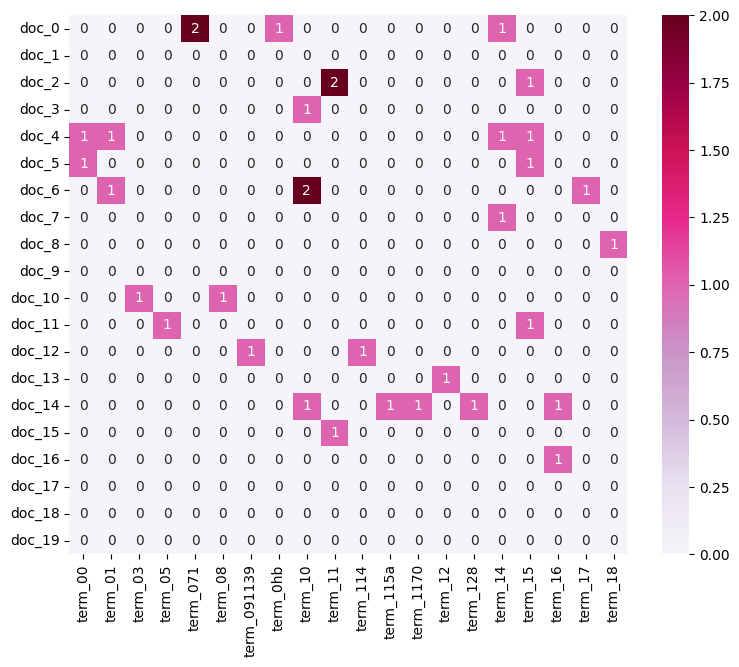

In [131]:
# Answer here

total = 0
arr = X_counts[0:20, 0:].toarray()
plot_x, plot_z = [], []
for i in range(20):
    tmp = []
    for i in range(20):
        tmp.append(-1)
    plot_z.append(tmp)

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
for i in range(X_counts.shape[1]):
    flag = 0
    for j in range(20):
        plot_z[j][total] = arr[j][i]
        if arr[j][i] != 0:
            flag = 1

    if flag:
        total += 1
        plot_x.append("term_"+str(count_vect.get_feature_names_out()[i]))
        if total == 20:
            break

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

---

In [132]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

----

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [180]:
l = np.asarray(X_counts[:, :20].sum(axis=0))[0]
x = [i for i in count_vect.get_feature_names_out()[:20]]

df = pd.DataFrame(l, x).T
df



,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,000usd,0010,001004,0010580b,001125,001200201pixel,0014,001642,00196,002
0,134,92,1,2,1,3,1,1,1,1,2,1,1,3,1,1,1,2,1,3


In [186]:
fig = px.histogram(df)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

---